This notebook 

# Import Libraries 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline


# Load The Titanic DataSet

In [2]:
train_df = pd.read_csv('input/train.csv')

# This will make it so we don't have errors, but can give us some results that are not quite accurate. Why?
train_df.fillna(0, inplace = True)



# Convert the survived column to strings for easier reading
train_df['Survived'] = train_df['Survived'].map({
    0: 'Died',
    1: 'Survived'
})

# Convert the Embarked column to strings for easier reading
train_df['Embarked'] = train_df['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,Southampton
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,Southampton
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,Southampton


# Exploring the data with sns.countplot()

If we have simple categorical data- sex, embarked, or even sibsp (number of siblings/spouses)- we can use Pandas methods to aggregate these, and perform a count:

## Sex

In [3]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

All this is fine if we are only looking to gather values. To really see the data it helps to graph it.

<AxesSubplot:xlabel='Sex', ylabel='count'>

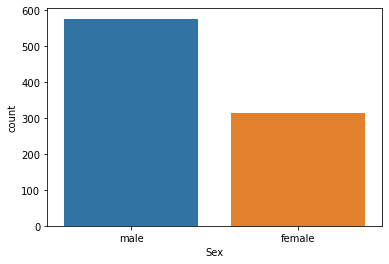

In [4]:
sns.countplot(x='Sex', data=train_df)

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


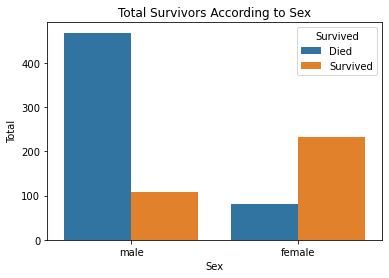

In [13]:
print(pd.crosstab(train_df["Sex"],train_df.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = train_df)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

Let's look at how many passengers Lived or Dies in each Passenger Class

## Class

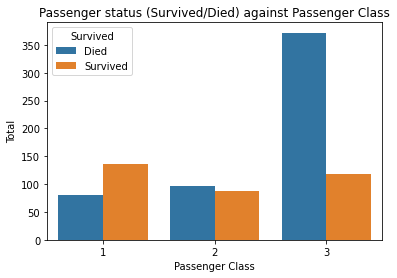

In [8]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

## Age

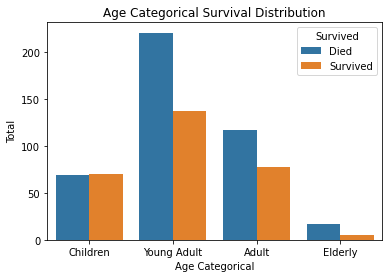

In [15]:
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Young Adult','Adult', 'Elderly']
train_df['Age_cats'] = pd.cut(train_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = train_df, hue = 'Survived')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

## Embark

Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       217


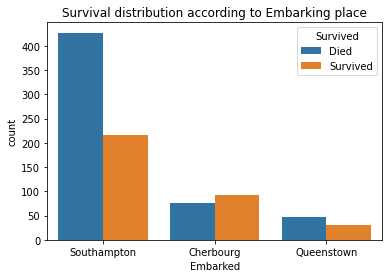

In [18]:
print(pd.crosstab(train_df['Embarked'], train_df.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

# Exploring with scatterplots and correlation

This is a very simple example showing the count of each distinct item. We are not really gaining any insight we do not already know.

We can also do things like scatter plots of bi-variate data, i.e. age vs fare:

<AxesSubplot:xlabel='Age', ylabel='Fare'>

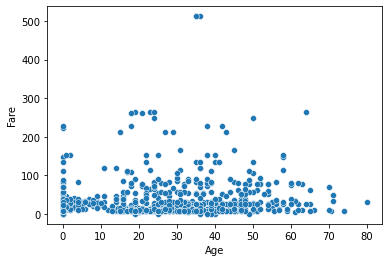

In [5]:
sns.scatterplot(x='Age', y='Fare', data=train_df)

And add a line of regression to see the correlation:



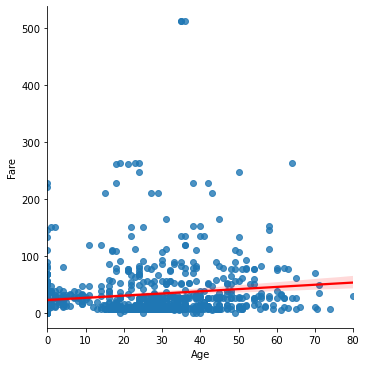

In [6]:
sns.lmplot( x='Age', 
           y='Fare', 
           data=train_df, 
           line_kws={'color':'red'}
          )

All these graphs shown before can be extended to show multi-dimensional data.



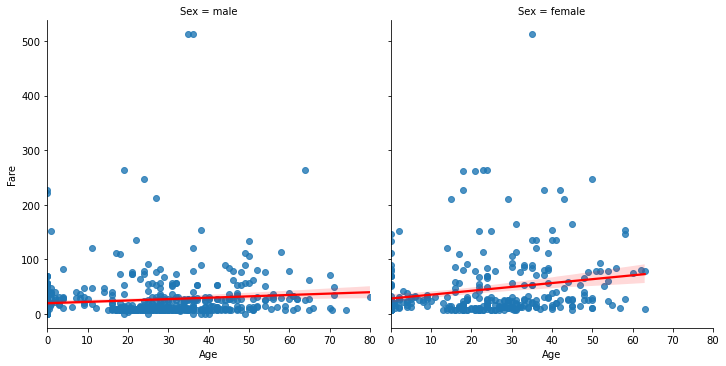

In [7]:
sns.lmplot( x='Age', 
           y='Fare', 
           data=train_df, 
           line_kws={'color':'red'},
           col='Sex'
          )